# **Classificação Fumante: Combinação Modelos de Classificação**

Como foi visto nos anteriores caso (**KNN**, **RLinear** ou **Árvore de Decisão**) o fato de ser ou não fumante afeta muito o valor dos custos médicos quando falamos de seguro de saúde, portanto é possível de que a passoa omita o fato de ser fumante ou não. Esta omissão pode ser considerada como fraude e traz um grande perjuizo nas empresas que brindam estes planos.  

Em principio não teríamos a necesidade de prever a variável fumante (definida por Sim =1  e Não = 0). Assume-se que esta é uma variável cadastral, mas por se uma variável muito importante no cálculo dos custos médicos do plano de saúde é muito importante examinar a veracidade das informações dos dados cadastrais. Isto é, a idea não é predecir se a pessoa é fumante ou não, a ideia fundamental é verificar as informações fornecidas (ser fumante) para evitar perjuizo.

Com base nesta necessidade, a ideia neste problema é determinar se um novo elemento corresponde ou não a alguma das categorias (0, 1) de uma determinada variável (Fumante).

Para nosso caso ilustrativo vamos determinar (classificar) se elementos correspondem a uma determinada característica (variável fumante) usando como informação os dados de custos médicos. 

---


# Importação dos Dados:

Os dados podem ser obtido do site do Kaggle.com. Podemos fazer um download e depois abrir ou também importar diretamente usando um link onde esta o arquivo. Esses dados serão guardados na variável **dados** do tipo _dataframe_.

In [ ]:
# importação via github 
import pandas as pd
url = 'https://raw.githubusercontent.com/profjuanito/Dataset/main/insurance.csv'
dados = pd.read_csv(url)

# Informações dos dados e Mise en place:

Obter informações gerais dos dados como número de variáveis, tipo, etc. Os comandos podem ser visualizados e entendidos melhor nos anteriores scripts (Custos_Medicos.ipynb, etc)

Lembrar o que foi feito nos modelos anteriores:

* Transformar a variável **Fumante** em 0 (não) ou 1 (sim)
* Colocar a variável resposta na escala para cada mil dolares.

Nesta análise também vamos considerar só as variáveis:
* var. dependiente: **Fumante**
* var. independientes: índice de massa corporal (**IMC**), Idade(**age**) e o **custo**

In [ ]:
# mise un place
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 
dados['sex'] = dados['sex'].map({'male': 1, 'female': 0})

dados = dados[['age', 'bmi', 'sex', 'charges','smoker']]
dados.head()

,age,bmi,sex,charges,smoker
0,19,27.900,0,16.884924,1
1,18,33.770,1,1.725552,0
2,28,33.000,1,4.449462,0
3,33,22.705,1,21.984471,0
4,32,28.880,1,3.866855,0


In [ ]:
# separação de variáveis preditoras e variával resposta
#X = dados[['age', 'bmi', 'charges']]
X = dados[['bmi', 'charges']]
y = dados['smoker'] 

---
# *Upgrade na Técnica de Validação: _K-FOLD REPETIDO_*

##Combinação de Modelos

A ideia é construir modelos simple para posteriormente fazer uma combinação entre estes modelos para alcançar um resultado melhor.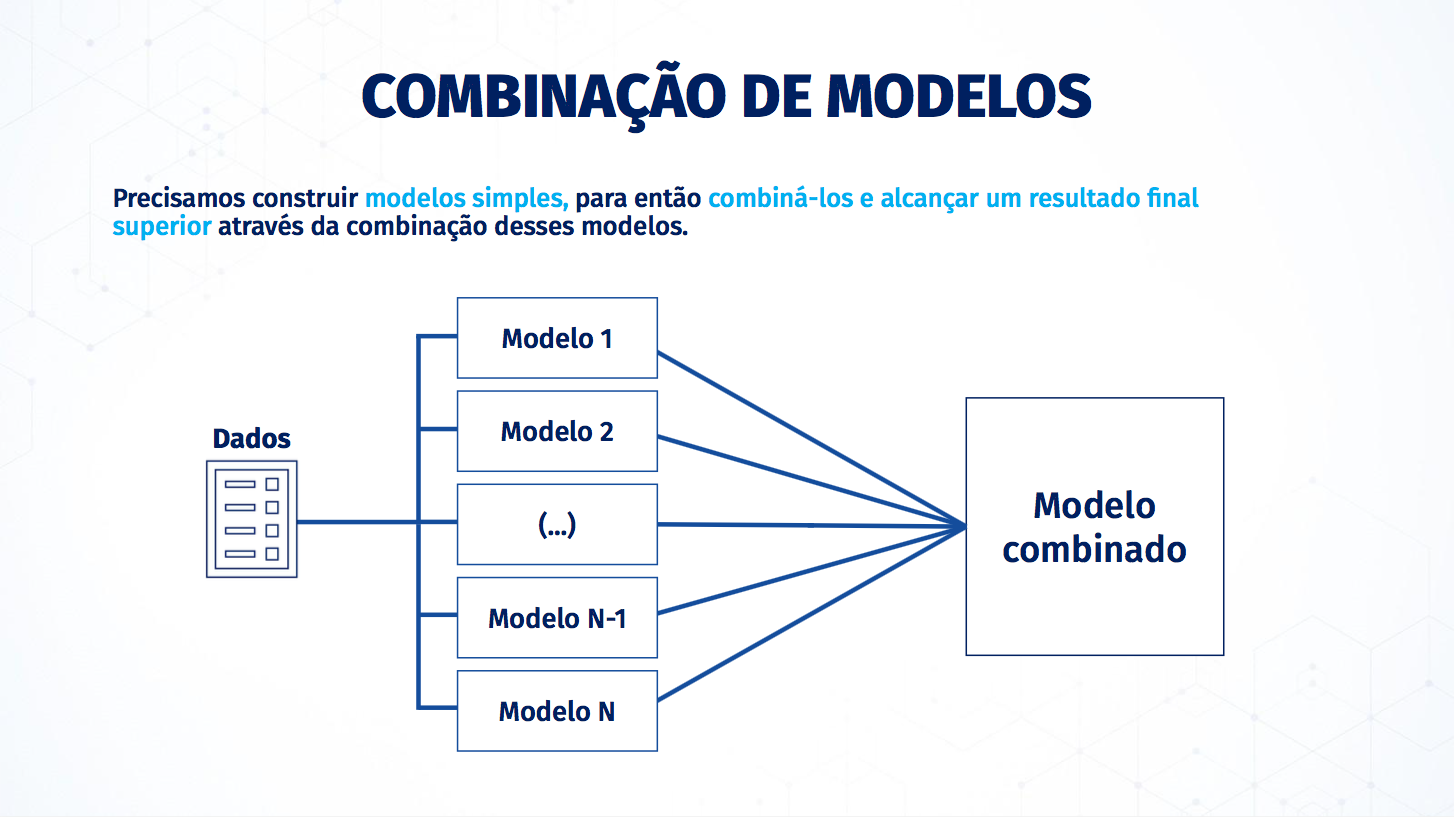



##Como Fazer a Predição

A ideia fundamental é fazer a estimativa de cada modelo por separado e utilizamos uma estrategia pra combinar estes resultados. Isto é, fazer uma combinação por votos. Podemos separar esta decisão em dois tipos. 

Para o caso de uma classificação (usando Regressão Logística, K-NN e Árvore de Decisão):

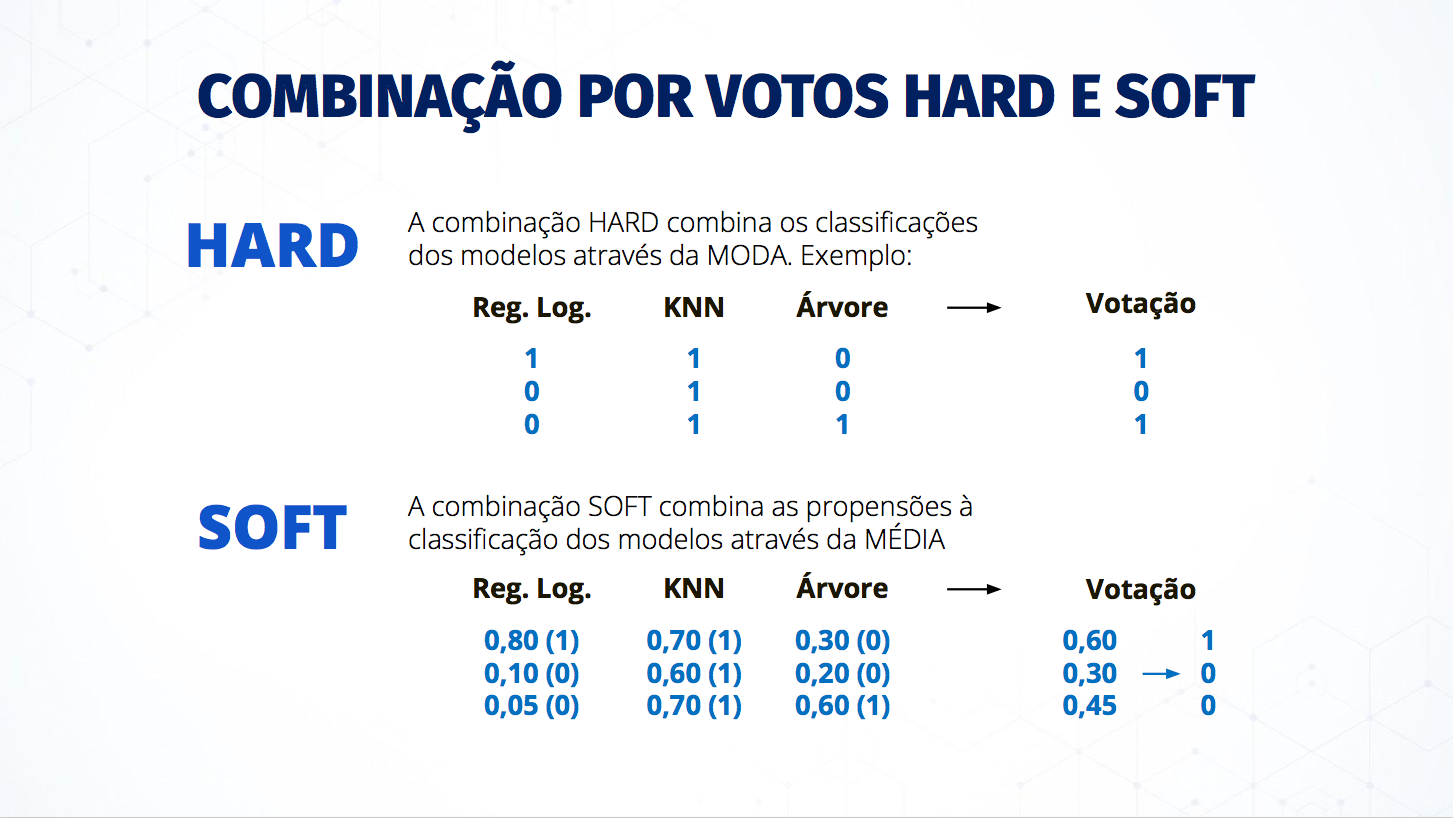

Para o caso Hard: consideramos simplemente a a decisão da maioría.

Para o caso Soft: se considera uma nova variável (propensão) e se estabelece a média.

## Upgrade na Técnica de Validação: _K-FOLD REPETIDO_

O Método de _K-Fold_ va ser repetido. Isto é, sera feito varias vezes e se obtem a média. 

Lembrando:

Para a validação chamamos a biblioteca _sklearn.model_selection_ 

aplicando as funções:
   * _RepeatedKFold_ -> define repetições no K-Fold
   * _cross_validate_ -> a função que faz a validação cruzada e calcula a métrica.

n_splits: definição das partes no K-Fold

n_repeats : define quantas vezes será repetido o K-Fold

In [ ]:
# Configuração da Validação Cruzada

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

validacao = RepeatedKFold(n_splits = 10, n_repeats = 3)

###Fazendo os Modelos por separado

Será feita uma combinação entre os modelo: **Arvore de decisão** (com diferentes valores de profundidades), de **K-NN** (com diferentes valores de k) e de **Regressão Logística** é preferível criar uma função a qual será chamada por cada modelo. 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

**Para a Regressão Logística:**

Da mesmo forma, como feito anteriormente, a análise feita observando a acurárcia. O resultado mostra uma lista com 30 valores que corresponde ao KFold com 3 repetições com 10 partes.

In [ ]:
# Regressão Logística

modelo = LogisticRegression() 
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 4)

0.9327

In [ ]:
medidas

{'fit_time': array([0.01761651, 0.01236725, 0.01257753, 0.01117039, 0.01411152,
        0.01872373, 0.01371622, 0.01840878, 0.01142502, 0.0108254 ,
        0.01267076, 0.01134419, 0.0116806 , 0.01575065, 0.01086283,
        0.01091909, 0.01094604, 0.01248026, 0.01085305, 0.01140428,
        0.01104641, 0.0122757 , 0.0119729 , 0.01461864, 0.01083517,
        0.01171303, 0.01140594, 0.01060843, 0.01082158, 0.01078749]),
 'score_time': array([0.00249219, 0.00202656, 0.00192881, 0.00189686, 0.0030961 ,
        0.00290322, 0.00202703, 0.00228071, 0.0019412 , 0.00188684,
        0.00194693, 0.00193763, 0.0020268 , 0.00201344, 0.00196648,
        0.00194001, 0.00191975, 0.0019021 , 0.00195718, 0.00198221,
        0.00215912, 0.00226593, 0.00193453, 0.00217319, 0.00190854,
        0.00211549, 0.00186563, 0.00193524, 0.00187755, 0.00191593]),
 'test_score': array([0.94029851, 0.93283582, 0.91791045, 0.90298507, 0.92537313,
        0.95522388, 0.93283582, 0.95522388, 0.93233083, 0.92481203,
    

**Para K-NN:**

O resultado é obtido usando  k=25

In [ ]:
# KNN

modelo = KNeighborsClassifier(n_neighbors = 25) 
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 4)

0.9619

**Para Árvore de Decesão:**

O resultado é obtido para uma profundidade de 3

In [ ]:
# Árvore de Decisão

modelo = DecisionTreeClassifier(max_depth = 3) 
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 4)

0.9626

---

Obtendo o parâmetro  **propensão** 

Para o caso de fazer uma combinação Soft, cada modelo deve fornecer a medida de propensão. Veamos o caso de uma Regressão Logística

Usando  o comando _predict_proba_ -> fornece a propensão, que sería a probabilidade de que o elemento seja 0 ou 1. Para o primeiro elemento temos como resultado que: o elemento tem a probabilidade de  0.82 de ser 0 (Não ser fumante) e 0.17 de ser 1 (Fumante).

In [ ]:
# Modelos de Classificação com 'Probabilidade'
# interpretar como propensão à classificação

modelo = LogisticRegression()
modelo.fit(X,y) 
modelo.predict_proba(X).round(4).tolist()

[[0.8241, 0.1759],
 [0.9997, 0.0003],
 [0.999, 0.001],
 [0.175, 0.825],
 [0.9975, 0.0025],
 [0.9941, 0.0059],
 [0.9972, 0.0028],
 [0.9897, 0.0103],
 [0.9956, 0.0044],
 [0.0533, 0.9467],
 [0.9963, 0.0037],
 [0.0836, 0.9164],
 [0.9997, 0.0003],
 [0.9988, 0.0012],
 [0.1568, 0.8432],
 [0.9956, 0.0044],
 [0.9866, 0.0134],
 [0.9934, 0.0066],
 [0.9991, 0.0009],
 [0.0614, 0.9386],
 [0.9933, 0.0067],
 [0.999, 0.001],
 [0.9998, 0.0002],
 [0.0187, 0.9813],
 [0.9932, 0.0068],
 [0.9178, 0.0822],
 [0.723, 0.277],
 [0.9878, 0.0122],
 [0.9557, 0.0443],
 [0.0455, 0.9545],
 [0.0959, 0.9041],
 [0.9969, 0.0031],
 [0.9964, 0.0036],
 [0.9342, 0.0658],
 [0.0009, 0.9991],
 [0.9866, 0.0134],
 [0.9671, 0.0329],
 [0.9851, 0.0149],
 [0.0364, 0.9636],
 [0.0064, 0.9936],
 [0.9963, 0.0037],
 [0.9996, 0.0004],
 [0.9608, 0.0392],
 [0.9968, 0.0032],
 [0.9995, 0.0005],
 [0.9529, 0.0471],
 [0.9999, 0.0001],
 [0.9996, 0.0004],
 [0.8753, 0.1247],
 [0.0338, 0.9662],
 [0.9998, 0.0002],
 [0.9994, 0.0006],
 [0.3638, 0.6362],
 

---
---


## **Combinação de Modelos HARD**


Do modelos anteriores, feitos por separado, tinhamos que no máximo podemos alcançar um valor de 0.963

Vamos utilizar a biblioteca _sklearn.ensemble_ que define as clasificações

Também a função _VotingClassifier_ para fazer a combinação dos modelos.

Os modelos foram definidos e guardados em variáveis (tuplas: nome e modelo) **Reg. Logística**, **K-NN** par (k=25) e **Árvore** (profundidade=3)
 
**Começemos com a votação Hard:**

usamos o comando _Voting.Classifier_ para todos os modelos definidos.

Como resultado tivemos uma acuracia de 0.964 comparável ao caso de Árvore comprofundidade 3.

In [ ]:
# Combinação por votos 'Hard'

from sklearn.ensemble import VotingClassifier
 
reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25)
arvore = DecisionTreeClassifier(max_depth = 3) 

# Criar tuplas  (Nome do modelo e o modelo)
modelos = [('Reg. Log.', reglog),('KNN', knn),('Árvore', arvore)]

mod = VotingClassifier(modelos, voting = 'hard')
medidas = cross_validate(mod, X, y, cv = validacao, scoring = 'accuracy')
round(medidas['test_score'].mean(), 4)

0.9636

**Fazendo a conta para varios modelos:**

In [ ]:
from collections import namedtuple
dados_modelo = namedtuple('dados_modelo',['nome','modelo'])
t1 = dados_modelo('Regressão Logística', LogisticRegression()) 
tt1 = dados_modelo('KNN5', KNeighborsClassifier(n_neighbors = 5)) 
tt2 = dados_modelo('KNN15', KNeighborsClassifier(n_neighbors = 15)) 
tt3 = dados_modelo('KNN25', KNeighborsClassifier(n_neighbors = 25)) 
tt4 = dados_modelo('KNN35', KNeighborsClassifier(n_neighbors = 35)) 
ttt1 = dados_modelo('Árvore2', DecisionTreeClassifier(max_depth = 2))
ttt2 = dados_modelo('Árvore3', DecisionTreeClassifier(max_depth = 3))
ttt3 = dados_modelo('Árvore4', DecisionTreeClassifier(max_depth = 4))
ttt4 = dados_modelo('Árvore5', DecisionTreeClassifier(max_depth = 5))

In [ ]:
modu = [
        [t1,tt1,ttt1],[t1,tt1,ttt2],[t1,tt1,ttt3],[t1,tt1,ttt4],
        [t1,tt2,ttt1],[t1,tt2,ttt2],[t1,tt2,ttt3],[t1,tt2,ttt4],
        [t1,tt3,ttt1],[t1,tt3,ttt2],[t1,tt3,ttt3],[t1,tt3,ttt4],
        [t1,tt4,ttt1],[t1,tt4,ttt2],[t1,tt4,ttt3],[t1,tt4,ttt4],   
       ] 

accs = []
sens = []
vpps = []
indice = []
model1 = []
model2 = []
model3 = []      

In [ ]:
from sklearn.ensemble import VotingClassifier
i = 0
while i < len(modu):
  mod = VotingClassifier(modu[i], voting = 'hard')
  resultados = cross_validate(mod, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision']) 
   
  accs.append(resultados['test_accuracy'].mean())
  sens.append(resultados['test_recall'].mean())
  vpps.append(resultados['test_precision'].mean())
  indice.append(i+1)
  model1.append('Regressão Logística')
  m2=tt1.nome
  if i>3:
    m2=tt2.nome
    if i>7:
      m2=tt3.nome
      if i>11:
        m2=tt4.nome    
  model2.append(m2)
  if i==0 or i==4 or i==8 or i==12:
    m3=ttt1.nome
  if i==1 or i==5 or i==9 or i==13:
    m3=ttt2.nome    
  if i==2 or i==6 or i==10 or i==14:
    m3=ttt3.nome
  if i==3 or i==7 or i==11 or i==15:
    m3=ttt4.nome      
  model3.append(m3)
       
  i=i+1

aux = {'Modelo 1': model1,'Modelo 2': model2,'Modelo 3': model3,'Acurácia': accs, 'Sensibilidade': sens, 'Precisão': vpps}
resultados = pd.DataFrame(aux,index = indice)
resultados.sort_values(by = 'Acurácia', ascending = False).round(4)
#aux

,Modelo 1,Modelo 2,Modelo 3,Acurácia,Sensibilidade,Precisão
2,Regressão Logística,KNN5,Árvore3,0.9649,0.9656,0.8752
6,Regressão Logística,KNN15,Árvore3,0.9649,0.9741,0.8706
7,Regressão Logística,KNN15,Árvore4,0.9639,0.9712,0.8681
3,Regressão Logística,KNN5,Árvore4,0.9639,0.9656,0.8720
11,Regressão Logística,KNN25,Árvore4,0.9639,0.9674,0.8681
15,Regressão Logística,KNN35,Árvore4,0.9629,0.9664,0.8629
12,Regressão Logística,KNN25,Árvore5,0.9626,0.9589,0.8724
10,Regressão Logística,KNN25,Árvore3,0.9624,0.9664,0.8683
14,Regressão Logística,KNN35,Árvore3,0.9619,0.9660,0.8653
8,Regressão Logística,KNN15,Árvore5,0.9611,0.9574,0.8692


## Região de Decisão:

Gráficamos a região de clasificação: Para isto usamos uma separação simple de treino e teste, só de forma ilustrativa. 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


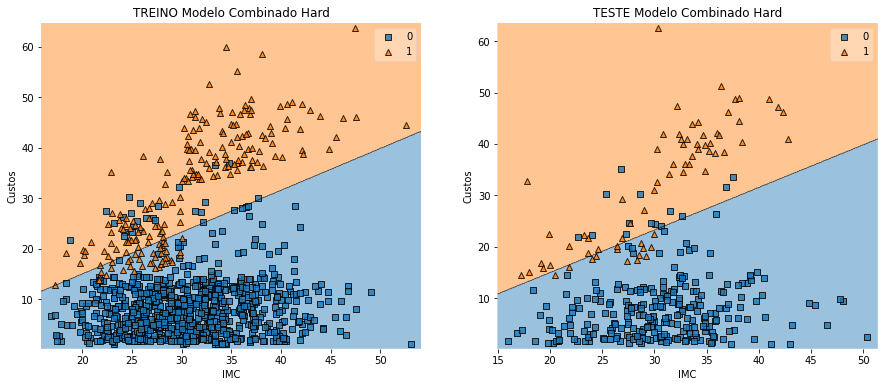

In [ ]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
  
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Modelo Combinado Hard')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Modelo Combinado Hard')   

plt.show()

---
## **Combinação de Modelos SOFT**


Para votação Soft: usamos o comando _Voting.Classifier_ considerando os mesmos modelos (igual ao caso Hard)

Como resultado tivemos uma acuracia de 0.9654 muito melhor que o melhor dos resultados obtidos por separado (caso de Árvore comprofundidade 3).

In [ ]:
# Combinação por votos 'Soft'

from sklearn.ensemble import VotingClassifier
 
reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25) 
arvore = DecisionTreeClassifier(max_depth = 3) 

modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)]
mod = VotingClassifier(modelos, voting = 'soft')
medidas = cross_validate(mod, X, y, cv = validacao, scoring = 'accuracy')

round(medidas['test_score'].mean(), 4)

0.9651

**Fazendo a conta para varios modelos:**

zeramos os valores

In [ ]:
accs = []
sens = []
vpps = []
indice = []
model1 = []
model2 = []
model3 = []

In [ ]:
from sklearn.ensemble import VotingClassifier
i = 0
while i < len(modu):
  mod = VotingClassifier(modu[i], voting = 'soft')
  resultados = cross_validate(mod, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision']) 
   
  accs.append(resultados['test_accuracy'].mean())
  sens.append(resultados['test_recall'].mean())
  vpps.append(resultados['test_precision'].mean())
  indice.append(i+1)
  model1.append('Regressão Logística')
  m2=tt1.nome
  if i>3:
    m2=tt2.nome
    if i>7:
      m2=tt3.nome
      if i>11:
        m2=tt4.nome    
  model2.append(m2)
  if i==0 or i==4 or i==8 or i==12:
    m3=ttt1.nome
  if i==1 or i==5 or i==9 or i==13:
    m3=ttt2.nome    
  if i==2 or i==6 or i==10 or i==14:
    m3=ttt3.nome
  if i==3 or i==7 or i==11 or i==15:
    m3=ttt4.nome      
  model3.append(m3)
       
  i=i+1

aux = {'Modelo 1': model1,'Modelo 2': model2,'Modelo 3': model3,'Acurácia': accs, 'Sensibilidade': sens, 'Precisão': vpps}
resultados = pd.DataFrame(aux,index = indice)
resultados.sort_values(by = 'Acurácia', ascending = False).round(4)
#aux

,Modelo 1,Modelo 2,Modelo 3,Acurácia,Sensibilidade,Precisão
6,Regressão Logística,KNN15,Árvore3,0.9666,0.9768,0.8751
10,Regressão Logística,KNN25,Árvore3,0.9661,0.9755,0.8746
11,Regressão Logística,KNN25,Árvore4,0.9654,0.9817,0.8676
15,Regressão Logística,KNN35,Árvore4,0.9651,0.9711,0.8725
7,Regressão Logística,KNN15,Árvore4,0.9649,0.9736,0.8678
16,Regressão Logística,KNN35,Árvore5,0.9646,0.9686,0.8744
4,Regressão Logística,KNN5,Árvore5,0.9644,0.9640,0.8765
3,Regressão Logística,KNN5,Árvore4,0.9644,0.9722,0.8694
14,Regressão Logística,KNN35,Árvore3,0.9641,0.9632,0.8706
2,Regressão Logística,KNN5,Árvore3,0.9636,0.9662,0.8704


## Região de Decisão:

Gráficamos a região de clasificação: Para isto usamos uma separação simple de treino e teste, só de forma ilustrativa. 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


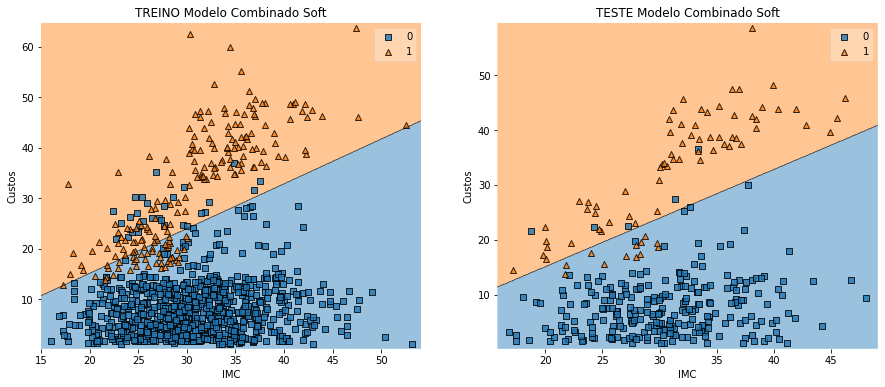

In [ ]:
# Região de Decisão

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Modelo Combinado Soft')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Modelo Combinado Soft')   

plt.show()

## Conclusão
Com a combinação dos modelos temos uma melhora na acurácia pasando a ter um valor de 0.9656 (para combinação Soft), melhor que para os modelos por separado. Os valores ficaram muito próximos, por tanto não podemos dizer que parâmetros foram os melhores. Relativamente piores foram quando foi usada uma profundidade da Árvore de Decisão = 2.

A adição de uma variável (Idade) continua sendo melhor, isto será feito com o mesmo procedimento e verificar se a inclusão da variável Idade melhora nossa predição.